# A. **Simple Regresi Linier** 

Teknik ini digunakan untuk menyelesaikan permasalahan hubungan sebab akibat antara 2 variable. 2 variable itu adalah :
1. Variable Faktor Penyebab - biasanya disimbolkan dengan X. Ini disebut `predictor`.
2. Variable Akibat - biasanya disimbolkan dengan Y. Ini disebut `response`.

Untuk pembelajaran kali ini kita akan menggunakan dataset `salary.csv`. Isinya adalah perbandingan YearsExperience seorang karyawan dengan Salary yang didapatkannya.


Mempersiapkan library yang akan digunakan

## **A. Exploratory Data Analysis ( EDA )**

### **1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### **2. Read CSV dan Print Data**

In [2]:
data = pd.read_csv('Salary_Data.csv')

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### **3. Melihat Variables Yang Ada**

In [4]:
data.keys()

Index(['YearsExperience', 'Salary'], dtype='object')

### **4. Melihat bentuk dari dataset**

Kolom pertama menyatakan jumlah baris dan kolom kedua menyatakan jumlah variablenya

In [5]:
data.shape

(30, 2)

### **5. Melihat 5 data awal**

Menggunakan fungsi `head()`

In [6]:
mydata = pd.DataFrame(data)
mydata.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### **6. Melihat 5 data akhir**

Menggunakan fungsi `tail()`

In [7]:
mydata.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


### **7. Melihat  Info Data**

Menggunakan fungsi `info()` kita akan melihat kolom data ( features ), jumlah data, dan tipe data. 

In [8]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## **B. Pre-process Data**

### **1. Split Data Dependent dan Independent**

1. Dependent Variable : variable yang dipengaruhi
2. Independent Variable : variable yang mempengaruhi


In [ ]:
# slice from the beginning to 'Salary'
data.loc[:, :'Salary']

In [10]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

Jika kodenya diekseskusi akan menghasilkan 2 variabel baru, yaitu **dataset** yang berisi keseluruhan data, x sebagai **independent variable**, dan y sebagai **dependent variable**

### **2. Split Data into Training Set and Test Set**

menggunakan library `scikit-learn`. Kode dibawah untuk membagi dataset kita menjadi `training set` sebesar **80%** dan `test set` sebesar **20%**. `XYxy` dideklarasikan untuk nantinya diproses dalam test dan training set

In [11]:
#Split data set menjadi Training Set dan Test Set
from sklearn. model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0) 

## **C. Training Data**

Data sudah kita bagi menjadi data uji ( test set ) dan data latih ( training set ). Sekarang waktunya kita melatih data kita dengan classifier/algoritma `LinearRegression` menggunakan library `Sklearn`.

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit (X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## **D. Predict Data**

Tujuan dari memprediksi data adalah prediksi hasil yang akan muncul dari dataset kita.

In [13]:
#Memprediksu hasil test set
y_pred = regressor.predict(X_test)

## **E. Visualisasi Data**

Waktunya melihat hasil visualisasi datanya. 

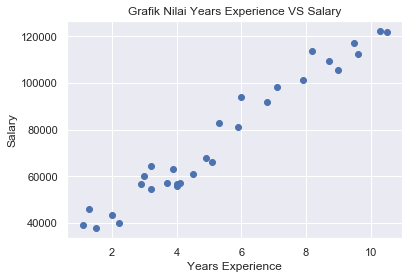

In [14]:
#Visualize Data
plt.scatter(mydata.YearsExperience,mydata.Salary)
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Grafik Nilai Years Experience VS Salary")
plt.show()

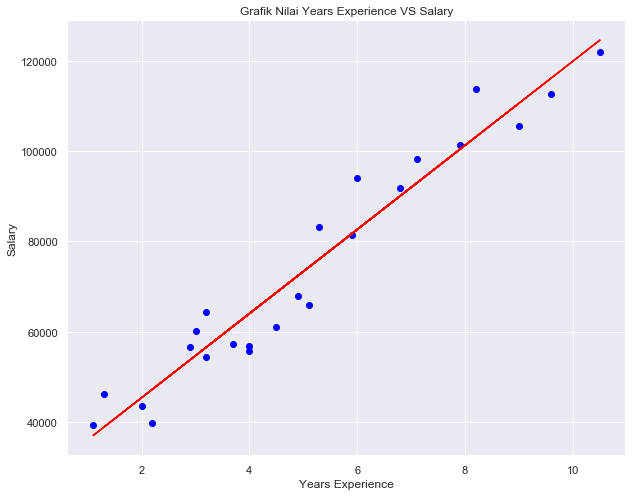

In [15]:
#Visualisasi Hasil Prediksi Pada Training Set
#Ukuran Plot
plt.figure(figsize=(10,8))
#Biru adalah data observasi
plt.scatter(X_train, y_train, color ='blue')
#Garis Merah adalah hasil prediction dari ML
plt.plot(X_train, regressor.predict(X_train),color='red')
#memberi judul dan label
plt.title("Grafik Nilai Years Experience VS Salary")
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()

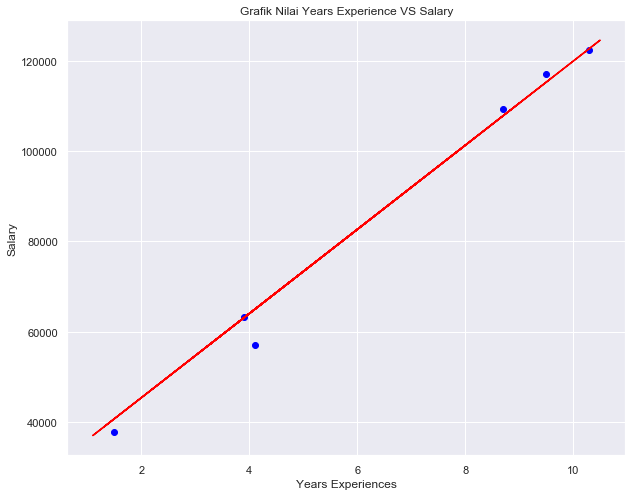

In [16]:
#Visualisasi data pada test set
#Ukuran Plot
plt.figure(figsize=(10,8))
#Biru adalah data observasi
plt.scatter(X_test, y_test, color ='blue')
#Garis Merah adalah hasil prediction dari ML
plt.plot(X_train, regressor.predict(X_train),color='red')
#memberi judul dan label
plt.title("Grafik Nilai Years Experience VS Salary")
plt.xlabel('Years Experiences')
plt.ylabel('Salary')
plt.show()

## **F. Uji Coba Model**

In [17]:
import ipywidgets as widgets
from IPython.display import display
textbox = widgets.FloatText(value=7.5, description='Years Experience:',disabled=False)
button = widgets.Button(description="Salary")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    y_hasil = regressor.predict([[textbox.value]])
    print("Years Experiences: %d" % textbox.value)
    print("Salary: %d" % y_hasil[0])

button.on_click(on_button_clicked)
display(textbox, output)
display(button, output)

FloatText(value=7.5, description='Years Experience:')

Output()

Button(description='Salary', style=ButtonStyle())

Output()

## **References**

1. Kukuh, R. 2018. Simple Linear Regression: Python. Link : https://medium.com/machine-learning-id/simple-linear-regression-python-e541ed030e40
2. Wahyono, T. 2018. Fundamental of Python For Machine Learning. Yogyakarta. Penerbit GAVA MEDIA.